Text(0.5, 1.0, '30 Year Mortgage vs SP Home Price Index')

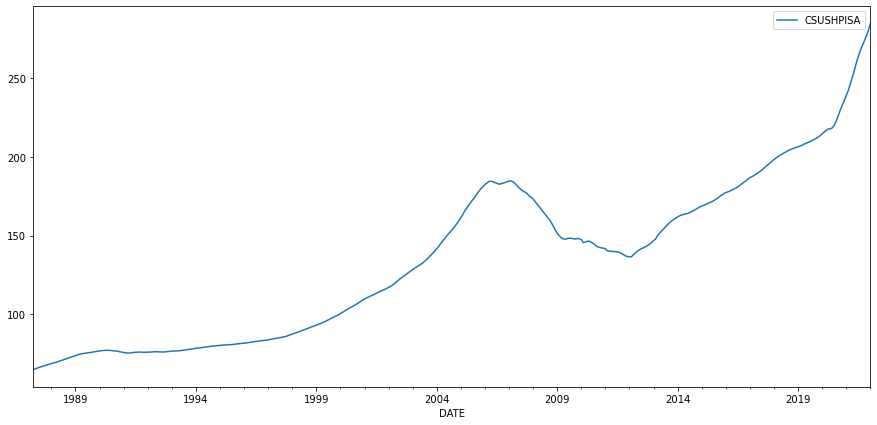

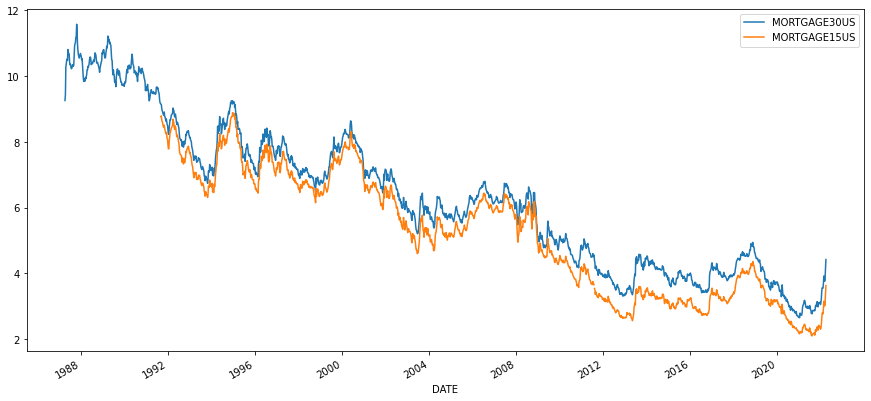

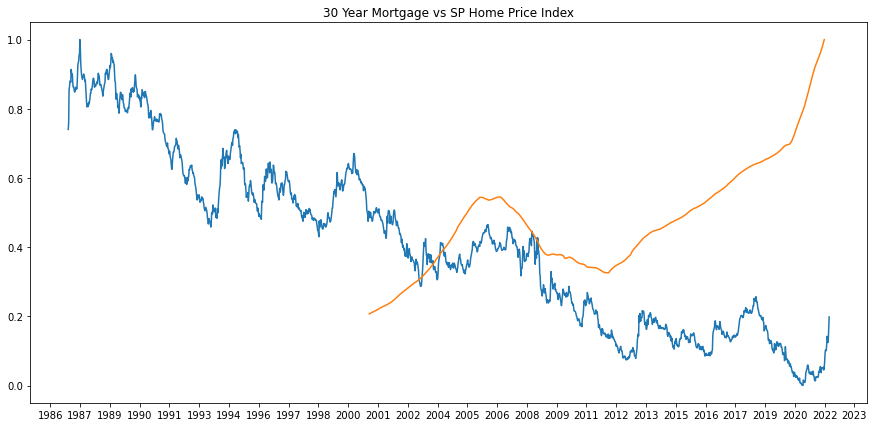

In [87]:
import pandas_datareader as pdr
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta
from matplotlib.ticker import MaxNLocator
import seaborn as sn

end = dt.now()
start = dt.now()-timedelta(days=(365.2425*35))

df_hpi = pdr.DataReader('CSUSHPISA', 'fred', start, end)
df_hpi.plot(figsize=(15,7))

df_mr = pdr.get_data_fred(['MORTGAGE30US','MORTGAGE15US'],start, end)
df_mr.plot(figsize=(15,7))

df_hpi = (df_hpi-df_hpi.min())/(df_hpi.max()-df_hpi.min())
df_mr = (df_mr-df_mr.min())/(df_mr.max()-df_mr.min())

mask = (df_hpi.index >'2001-01-01')
df_hpi = df_hpi.loc[mask]

fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_major_locator(MaxNLocator(30)) 

plt.plot(df_mr['MORTGAGE30US'], label='30YR Mortgage Rate Normalized')
plt.plot(df_hpi, label='SP Home Price Index Normalized')
#legend = ax.legend(loc='lower left', fontsize='small')
plt.title('30 Year Mortgage vs SP Home Price Index')

Visual interpretation indicates a move from negative correlation to positive correlation and back to negative correlation.

In [102]:
df_hpi 

,CSUSHPISA
DATE,
2001-02-01,0.206965
2001-03-01,0.209738
2001-04-01,0.212220
2001-05-01,0.214556
2001-06-01,0.217444
...,...
2021-09-01,0.936277
2021-10-01,0.949470
2021-11-01,0.964178


In [103]:
mask = (df_mr.index >'2001-01-01')
df_mr = df_mr.loc[mask]

df_mr['HPI'] = df_hpi['CSUSHPISA']
corr_matrix = df_mr.corr()

corr_matrix.head()

,MORTGAGE30US,MORTGAGE15US,HPI
MORTGAGE30US,1.000000,0.994417,-0.544545
MORTGAGE15US,0.994417,1.000000,-0.496628
HPI,-0.544545,-0.496628,1.000000


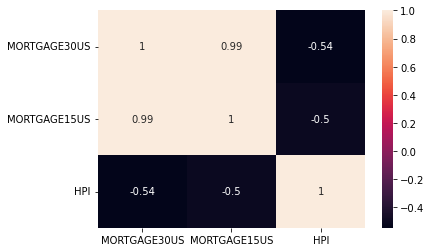

In [104]:
sn.heatmap(corr_matrix, annot=True)
plt.show()

<AxesSubplot:xlabel='DATE'>

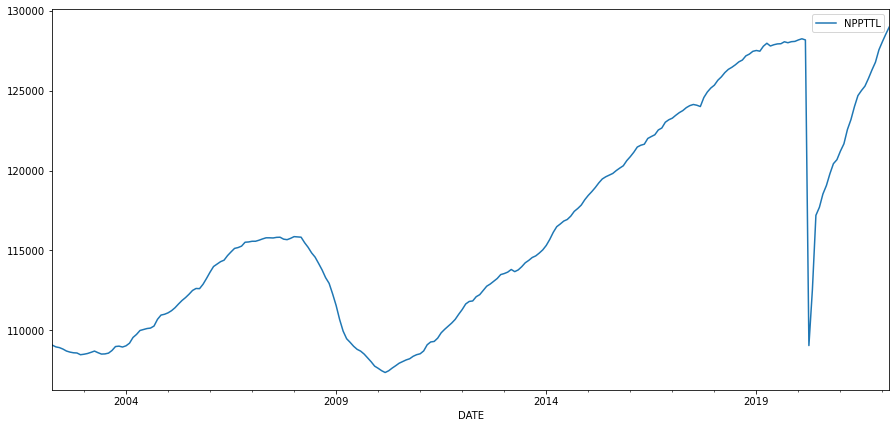

In [88]:
df_emp = pdr.DataReader('NPPTTL', 'fred', start, end)
df_emp.plot(figsize=(15,7))

Text(0.5, 1.0, 'Home Price Index vs Non Farm Payroll Normalized')

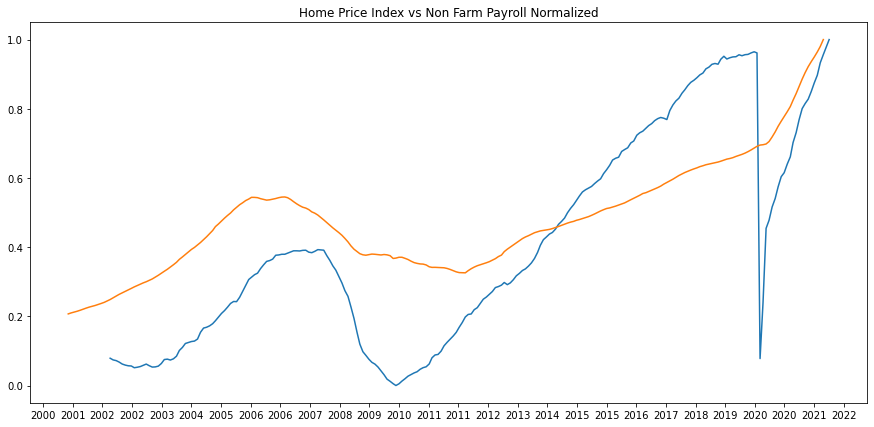

In [89]:
fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_major_locator(MaxNLocator(30)) 

df_emp = (df_emp-df_emp.min())/(df_emp.max()-df_emp.min())

plt.plot(df_emp, label='Non Farm Payroll Norm')
plt.plot(df_hpi, label='Home Price Index Norm')

#legend = ax.legend(loc='lower left', fontsize='small')
plt.title('Home Price Index vs Non Farm Payroll Normalized')

<AxesSubplot:xlabel='DATE'>

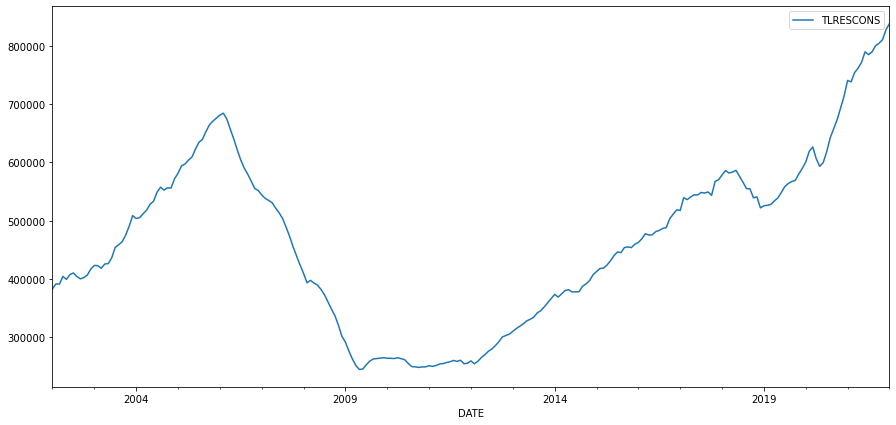

In [90]:
df_cons_spend = pdr.DataReader('TLRESCONS', 'fred', start, end)
df_cons_spend.plot(figsize=(15,7))

Text(0.5, 1.0, 'Construction Spending vs Non Farm Payroll vs Home Price Index')

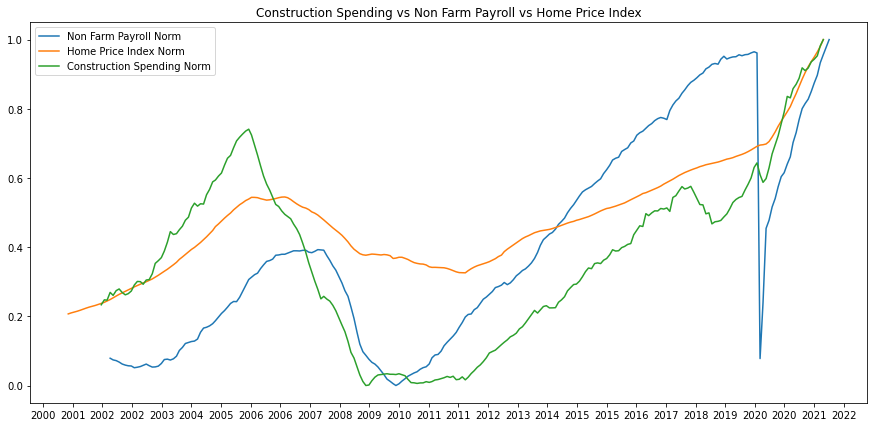

In [91]:
fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_major_locator(MaxNLocator(30)) 

df_cons_spend_norm = (df_cons_spend-df_cons_spend.min())/(df_cons_spend.max()-df_cons_spend.min())

plt.plot(df_emp, label='Non Farm Payroll Norm')
plt.plot(df_hpi, label='Home Price Index Norm')
plt.plot(df_cons_spend_norm, label='Construction Spending Norm')

legend = ax.legend(loc='upper left', fontsize='medium')
plt.title('Construction Spending vs Non Farm Payroll vs Home Price Index')

Text(0.5, 1.0, 'Construction Spending vs Home Price Index')

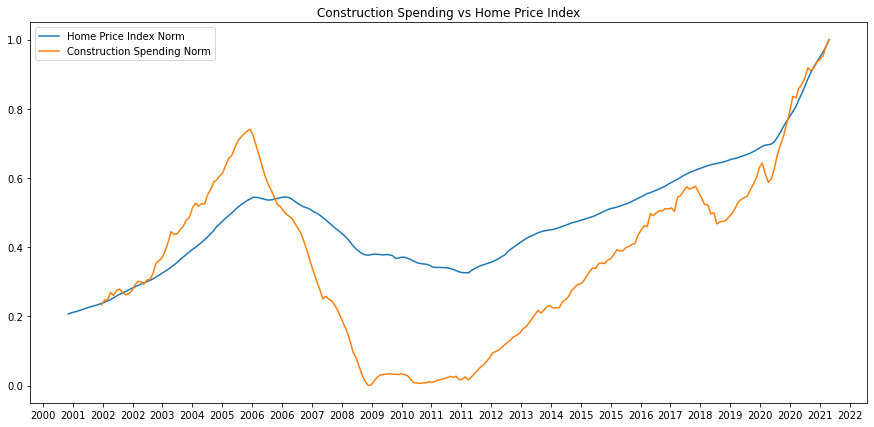

In [92]:
fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_major_locator(MaxNLocator(30)) 

#plt.plot(df_emp, label='Non Farm Payroll Norm')
plt.plot(df_hpi, label='Home Price Index Norm')
plt.plot(df_cons_spend_norm, label='Construction Spending Norm')

legend = ax.legend(loc='upper left', fontsize='medium')
plt.title('Construction Spending vs Home Price Index')

Text(0.5, 1.0, 'Non Farm Payroll vs Home Price Index')

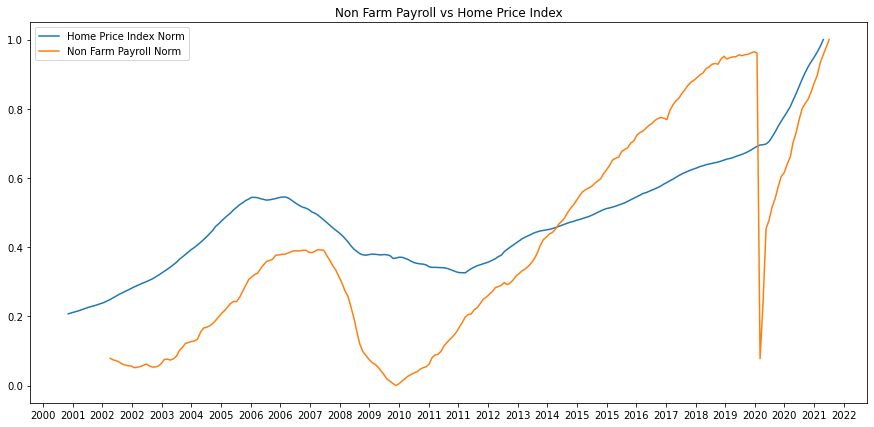

In [93]:
fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_major_locator(MaxNLocator(30)) 


plt.plot(df_hpi, label='Home Price Index Norm')
plt.plot(df_emp, label='Non Farm Payroll Norm')
#plt.plot(df_cons_spend_norm, label='Construction Spending Norm')

legend = ax.legend(loc='upper left', fontsize='medium')
plt.title('Non Farm Payroll vs Home Price Index')

In [94]:
df_emp_const_avg = df_cons_spend_norm

df_emp_const_avg

,TLRESCONS
DATE,
2002-01-01,0.233319
2002-02-01,0.247554
2002-03-01,0.246725
2002-04-01,0.269140
2002-05-01,0.260568
...,...
2021-09-01,0.935629
2021-10-01,0.943133
2021-11-01,0.953087


In [95]:
df_emp_const_avg['EMP'] = df_emp

df_emp_const_avg['AVG'] = (df_emp_const_avg['EMP'] +  df_emp_const_avg['TLRESCONS'])/2

df_emp_const_avg

,TLRESCONS,EMP,AVG
DATE,,,
2002-01-01,0.233319,NaN,NaN
2002-02-01,0.247554,NaN,NaN
2002-03-01,0.246725,NaN,NaN
2002-04-01,0.269140,0.078865,0.174002
2002-05-01,0.260568,0.073993,0.167281
...,...,...,...
2021-09-01,0.935629,0.849941,0.892785
2021-10-01,0.943133,0.874437,0.908785
2021-11-01,0.953087,0.896893,0.924990


<AxesSubplot:xlabel='DATE'>

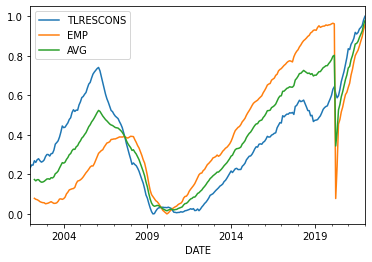

In [96]:
df_emp_const_avg.plot()

In [97]:
df_hpi

,CSUSHPISA
DATE,
2001-02-01,0.206965
2001-03-01,0.209738
2001-04-01,0.212220
2001-05-01,0.214556
2001-06-01,0.217444
...,...
2021-09-01,0.936277
2021-10-01,0.949470
2021-11-01,0.964178


In [98]:
mask = (df_hpi.index >'2001-01-01')
df_hpi = df_hpi.loc[mask]

Text(0.5, 1.0, 'Home Price Index vs AVG Metric')

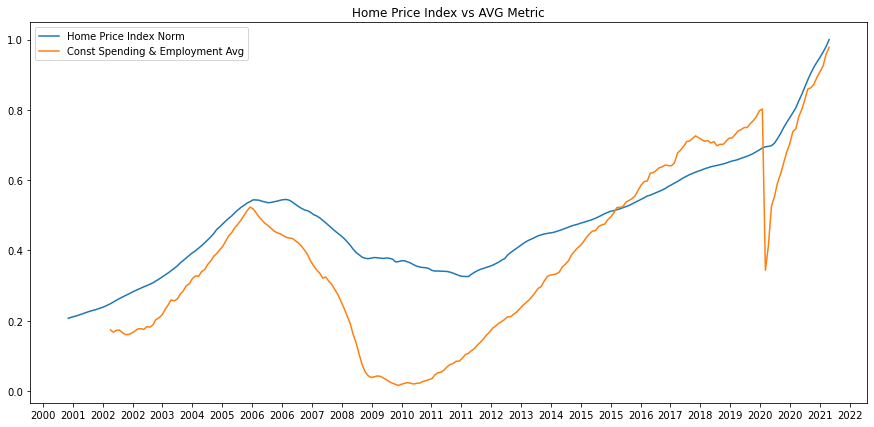

In [99]:
fig, ax = plt.subplots(figsize=(15,7))
ax.xaxis.set_major_locator(MaxNLocator(30)) 

plt.plot(df_hpi, label='Home Price Index Norm')
plt.plot(df_emp_const_avg['AVG'], label='Const Spending & Employment Avg')

legend = ax.legend(loc='upper left', fontsize='medium')
plt.title('Home Price Index vs AVG Metric')

In [100]:
df_emp_const_avg['HPI'] = df_hpi
corr_matrix = df_emp_const_avg.corr()

corr_matrix.head()

,TLRESCONS,EMP,AVG,HPI
TLRESCONS,1.000000,0.592961,0.871127,0.806687
EMP,0.592961,1.000000,0.911959,0.812075
AVG,0.871127,0.911959,1.000000,0.908374
HPI,0.806687,0.812075,0.908374,1.000000


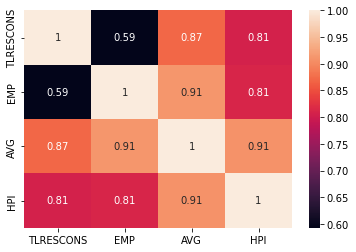

In [101]:
sn.heatmap(corr_matrix, annot=True)
plt.show()